# Direction of Arrival with freefield  synthesis 

In [76]:
import numpy as np
from importlib import reload
from matplotlib import pyplot as plt
from mu32 import beamformer, synthesis

reload( beamformer )
reload( synthesis )

<module 'mu32.synthesis' from '/Volumes/SSD4/Dépots/distalsense/Mu32/src/mu32/jupyter/mu32/synthesis.py'>

## Microphones antenna definition

In [77]:
n_mics = 16
c_angle = 0
antenna=[[2, 1.5, 1.2], n_mics, c_angle, 0.1]

## Sound sources properties

In [ ]:
sampling_frequency = 50000
n_freq = 5
duration = 0.4
frequencies = np.random.randint(100,300, ( 1, n_freq ) )
magnitudes = np.array( range( n_freq ) ) / n_freq  + 1/n_freq
phases = np.random.randint(1,10, ( 1, n_freq ) ) / (n_freq-1)*2*np.pi
locations = [[0.2, 3, 1.2], [0.6, 3, 1.2], [1, 3, 1.2], [1.4, 3, 1.2], [1.8, 3, 1.2], [2.2, 3, 1.2], [2.6, 3, 1.2], [3, 3, 1.2], [3.4, 3, 1.2], [3.8, 3, 1.2]]
n_locations = np.size(locations,0)

## Showing the relative positions of sources and microphones

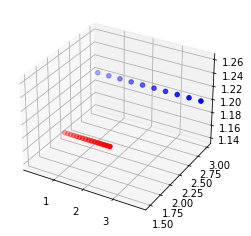

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

microphones = beamformer.antenna_linear_2D( antenna )
ax.scatter(microphones[0,:], microphones[1,:], microphones[2,:], c='r', marker='o')
ax.scatter(np.array(locations).T[0,:], np.array(locations).T[1,:], np.array(locations).T[2,:], c='b', marker='o')

plt.show()

In [80]:
beamformer.room_cues( antenna, locations, sf=sampling_frequency )

 .Arrival differences in samples between microphones: 
 [[  0   8  17  27  37  47  58  69  80  92 104 116 128 140 153 165]
 [  0   6  13  20  28  37  46  56  66  76  87  98 109 121 133 144]
 [  0   2   6  11  16  22  29  37  45  54  63  73  83  93 104 115]
 [  0   0   0   0   2   5   9  14  19  25  32  40  48  57  66  75]
 [ 14   9   5   2   0   0   0   0   2   5   9  14  19  25  32  40]
 [ 40  32  25  19  14   9   5   2   0   0   0   0   2   5   9  14]
 [ 75  66  57  48  40  32  25  19  14   9   5   2   0   0   0   0]
 [115 104  93  83  73  63  54  45  37  29  22  16  11   6   2   0]
 [144 133 121 109  98  87  76  66  56  46  37  28  20  13   6   0]
 [165 153 140 128 116 104  92  80  69  58  47  37  27  17   8   0]]
 .Maximum delay in samples number is: 165 samples
 .Signals can be fully localized for frequencies less than 303 Hz (due to microphones inter-distances)
 .Map phases is coherent for frequencies less than 233 Hz (due to antenna dimensions


## Signals generation and antenna recording
Generate a synthesis signal and get the signals passed through a free field space and capted by the microphones antenna

In [81]:
source = synthesis.gen_wav( [frequencies[0], magnitudes, phases[0]], sampling_frequency, duration )

freefield_signals = synthesis.freefield_record( 
    source=source,
    antenna=antenna,
    locations=locations,
    sf=sampling_frequency 
)


microphones delays are: [300 296 295 296 299 304 311 319 330 342 356 371 387 404 421 440] samples
microphones delays are: [274 267 262 260 260 262 267 274 284 295 308 322 338 355 373 391] samples
microphones delays are: [260 249 240 234 230 229 231 235 243 252 264 278 293 309 327 345] samples
microphones delays are: [258 244 231 220 212 207 205 206 210 217 227 239 253 269 286 304] samples
microphones delays are: [270 252 236 222 210 201 194 191 191 194 201 210 222 236 252 270] samples
microphones delays are: [293 274 256 239 224 211 201 193 189 187 190 195 204 215 229 244] samples
microphones delays are: [325 305 286 268 251 236 223 212 204 199 196 198 202 209 219 232] samples
microphones delays are: [364 344 324 306 288 272 257 244 234 225 219 216 216 219 225 234] samples
microphones delays are: [407 387 368 349 331 315 299 285 273 262 254 248 244 244 245 250] samples
microphones delays are: [454 435 415 397 379 362 346 331 318 306 296 288 282 278 277 278] samples


## Init beamformer

In [83]:
beams_number = 11
bfwin_duration = 0.1
G = beamformer.das_former( antenna, beams_number, sf=sampling_frequency, bfwin_duration=bfwin_duration )

## Process beamforming

<BarContainer object of 12 artists>

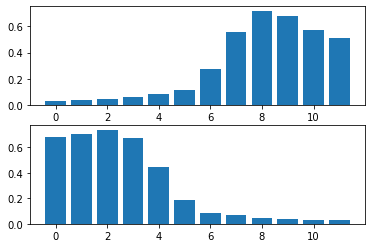

In [87]:
# select first and last source positions
powers, beams_number = beamformer.das_doa( G, freefield_signals[0], sf=sampling_frequency, bfwin_duration=bfwin_duration )
plt.subplot(211)
plt.bar( np.array( range(beams_number) ), powers[:,0] )
powers, beams_number = beamformer.das_doa( G, freefield_signals[9], sf=sampling_frequency, bfwin_duration=bfwin_duration )
plt.subplot(212)
plt.bar( np.array( range(beams_number) ), powers[:,0] )